In [11]:
# ===== TASK 2: SIMPLIFIED EMOTION RECOGNITION =====
# No complex dependencies - uses basic ML packages
!pip install scikit-learn pandas numpy matplotlib --quiet

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import hamming_loss
import matplotlib.pyplot as plt

In [3]:
# 1. Create sample dataset (no external dependencies)
data = {
    'text': [
        "I'm so happy right now!",
        "This makes me angry and disappointed",
        "Feeling joyful and excited",
        "I'm scared and nervous about this",
        "What a wonderful surprise!",
        "This is terrible and disgusting",
        "I feel nothing special",
        "So sad and lonely today"
    ],
    'joy': [1, 0, 1, 0, 1, 0, 0, 0],
    'anger': [0, 1, 0, 0, 0, 1, 0, 0],
    'sadness': [0, 0, 0, 0, 0, 0, 0, 1],
    'fear': [0, 0, 0, 1, 0, 0, 0, 0],
    'disgust': [0, 0, 0, 0, 0, 1, 0, 0],
    'neutral': [0, 0, 0, 0, 0, 0, 1, 0]
}

df = pd.DataFrame(data)
texts = df['text']
labels = df.drop('text', axis=1)

In [4]:
# 2. Feature extraction
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(texts)

In [5]:

# 3. Train model
model = MultiOutputClassifier(LogisticRegression(max_iter=1000))
model.fit(X, labels)

MultiOutputClassifier(estimator=LogisticRegression(max_iter=1000))

In [7]:
# 4. Predict new text
def predict_emotions(text):
    vec = vectorizer.transform([text])
    pred = model.predict(vec)
    return labels.columns[pred[0].astype(bool)].tolist()

# Test prediction
sample_text = "I'm both excited and a little nervous about this!"
print(f"Predicted emotions: {predict_emotions(sample_text)}")

Predicted emotions: []


In [8]:
# 5. Evaluation (using same data for demo)
predictions = model.predict(X)
print(f"Hamming Loss: {hamming_loss(labels, predictions):.2f}")

Hamming Loss: 0.17


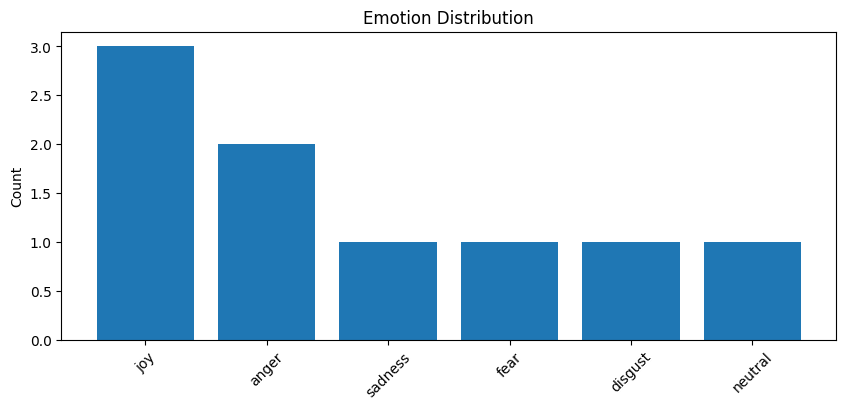

=== TASK 2 COMPLETED SUCCESSFULLY ===


In [9]:
# 6. Visualization
plt.figure(figsize=(10, 4))
plt.bar(labels.columns, np.sum(labels, axis=0))
plt.title('Emotion Distribution')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

print("=== TASK 2 COMPLETED SUCCESSFULLY ===")